In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
data = pd.read_csv('poly_regression_data.csv')

# Pre-Processing Data

In [5]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [7]:
data.shape

(10, 3)

In [6]:
data.isnull().sum() # no null-entries in data

Position    0
Level       0
Salary      0
dtype: int64

In [13]:
x = data.iloc[:, 1:-1] # input parameter is going to be the level of the employee
y = data.iloc[:, -1:] # output parameter is going to be the salary of the employee

# Showing that Simple Linear Regression is not enough

In [15]:
linear_regressor = LinearRegression()

In [16]:
linear_regressor.fit(x, y)

LinearRegression()

In [17]:
predicted_value = linear_regressor.predict(x)

In [20]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(predicted_value, y)

In [22]:
MSE # MSE is very high, implying that the data may not be well-predicted by the model

26695878787.878788

A visual presentation to show that the linear regression model is not ideal for this data set

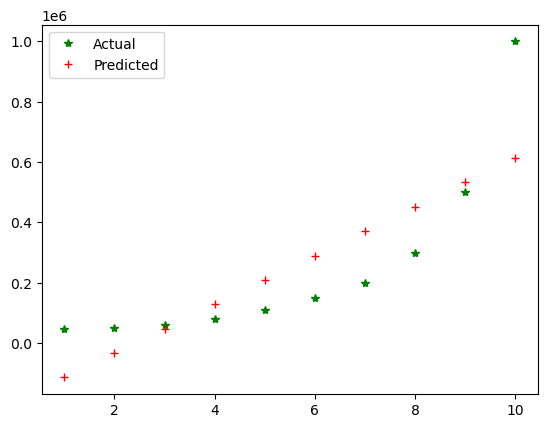

In [24]:
plt.plot(x, y, '*', color = 'green', label = 'Actual')
plt.plot(x, predicted_value, '+', color = 'red', label = 'Predicted')
plt.legend()
plt.show()

Therefore, we will use Polynomial Regression Model for this data. 

In [41]:
polynomial_regressor = PolynomialFeatures(degree = 2) # degree 2 because the actual x and y have a parabolic shape

In [42]:
x_polynomial = polynomial_regressor.fit_transform(x) # fitting the input value into a polynomial regressor first

In [43]:
x_polynomial

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [44]:
poly_lin_regressor = LinearRegression() # initializing a new linear regressor

In [45]:
poly_lin_regressor.fit(x_polynomial, y)

LinearRegression()

In [46]:
poly_predicted_value = poly_lin_regressor.predict(x_polynomial)

A visual presentation of the polynomial linear regression

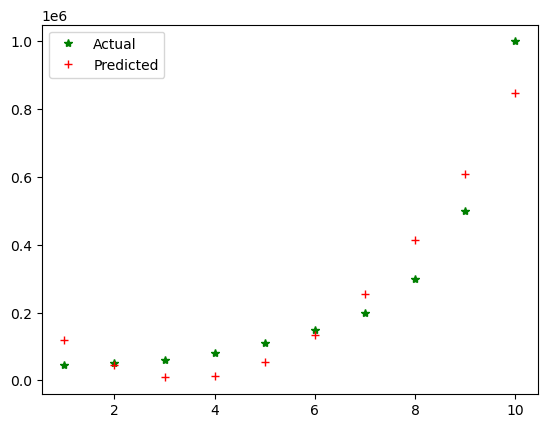

In [47]:
plt.plot(x, y, '*', color = 'green', label = 'Actual')
plt.plot(x, poly_predicted_value, '+', color = 'red', label = 'Predicted')
plt.legend()
plt.show()

In [49]:
poly_MSE = mean_squared_error(y, poly_predicted_value)

In [52]:
print(poly_MSE) 

print(MSE) # This is the MSE from the Simple Linear Regression Model

percent_improve = 100 * (MSE - poly_MSE)/MSE

print('The percentage improvement of poly_MSE over the MSE from the simple linear regression is ', percent_improve, '%')

6758833333.333334
26695878787.878788
The percentage improvement of poly_MSE over the MSE from the simple linear regression is  74.68210959812207 %


In some cases, if we choose to increase the degree of the polynomial, we will get better improvements for polynomial linear regression as show below with degree 4

In [59]:
new_polynomial_regressor = PolynomialFeatures(degree = 4)

In [60]:
new_x_poly = new_polynomial_regressor.fit_transform(x)

In [61]:
new_poly_lin_regressor = LinearRegression()

In [62]:
new_poly_lin_regressor.fit(new_x_poly, y)

LinearRegression()

In [63]:
new_poly_predicted_value = new_poly_lin_regressor.predict(new_x_poly)

A visual presentation of better predictive power of degree 4 polynomial linear regression

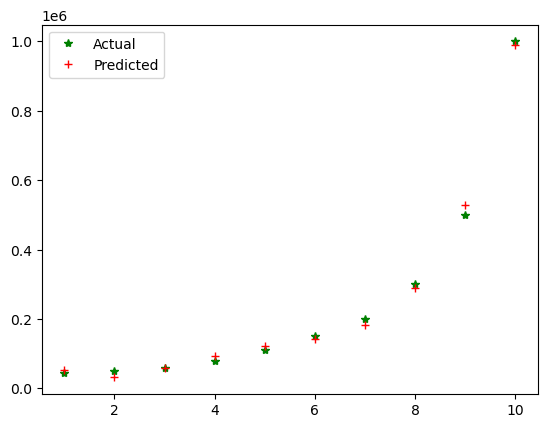

In [69]:
plt.plot(x, y, '*', color = 'green', label = 'Actual')
plt.plot(x, new_poly_predicted_value, '+', color = 'red', label = 'Predicted')
plt.legend()
plt.show()

In [70]:
# same thing demonstrated with percentage calculation, based on respective MSE

In [71]:
new_poly_MSE = mean_squared_error(y, new_poly_predicted_value)
new_percent_improve = 100 * (MSE - new_poly_MSE)/MSE

In [72]:
print('The MSE for simple linear regression is ', MSE)
print('The MSE for degree 2 polynomial linear regression is ', poly_MSE, ' which is ', percent_improve, ' % improvement over simple linear regression')
print('The MSE for degree 4 polynomial linear regression is ', new_poly_MSE, ' which is ', new_percent_improve, ' % improvement over degree 2 linear regression ')

The MSE for simple linear regression is  26695878787.878788
The MSE for degree 2 polynomial linear regression is  6758833333.333334  which is  74.68210959812207  % improvement over simple linear regression
The MSE for degree 4 polynomial linear regression is  210343822.8438184  which is  99.21207380167112  % improvement over degree 2 linear regression 
